## Trying to interpret singular vectors

In [1]:
%run ../imports.py

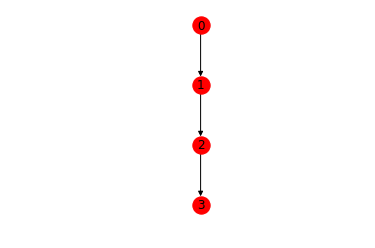

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
#    (0,1),
    (1,2),
    (2,3)
#    (3,0)
])
G.add_edge(0,1,weight=1.1)
N = nx.number_of_nodes(G)
plt.axis('off')
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

In [4]:
L

matrix([[ 1.1, -1.1,  0. ,  0. ],
        [ 0. ,  1. , -1. ,  0. ],
        [ 0. ,  0. ,  1. , -1. ],
        [ 0. ,  0. ,  0. ,  0. ]])

### Symmetrization

In [5]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [17]:
Q

matrix([[ 0.3551, -0.708 ,  0.5704, -0.2175],
        [ 0.4859, -0.3921, -0.5972,  0.5034],
        [ 0.6227,  0.3082, -0.2607, -0.6703]])

In [6]:
print(eqL)

[[ 5.5000e-01 -5.5000e-01 -2.6472e-16 -5.9522e-16]
 [-5.5000e-01  1.0500e+00 -5.0000e-01  6.5310e-16]
 [ 4.7030e-16 -5.0000e-01  1.0000e+00 -5.0000e-01]
 [-5.1871e-16  4.0177e-16 -5.0000e-01  5.0000e-01]]


Create undirected graph from the equivalent Laplacian

In [7]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [8]:
print(eqL)

[[ 5.5000e-01 -5.5000e-01 -2.6472e-16 -5.9522e-16]
 [-5.5000e-01  1.0500e+00 -5.0000e-01  6.5310e-16]
 [ 4.7030e-16 -5.0000e-01  1.0000e+00 -5.0000e-01]
 [-5.1871e-16  4.0177e-16 -5.0000e-01  5.0000e-01]]


In [9]:
np.linalg.matrix_rank(eqL)

3

In [10]:
posG, negG = separate_graphs(eqL)

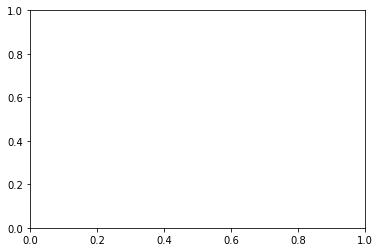

In [11]:
nx.draw_networkx(negG)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


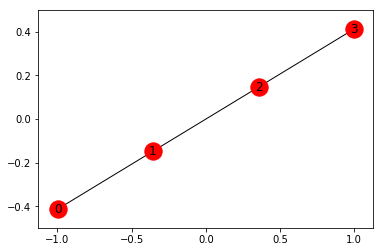

In [12]:
nx.draw_networkx(posG)

In [13]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [14]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [15]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([-1.5000e+00, -5.0000e-01, -5.6856e-17]),
 matrix([[ 4.0825e-01,  7.0711e-01,  5.7735e-01],
         [-8.1650e-01, -6.1759e-16,  5.7735e-01],
         [ 4.0825e-01, -7.0711e-01,  5.7735e-01]]))

In [16]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.5,  0.5,  0. ],
        [ 0.5, -1. ,  0.5],
        [ 0. ,  0.5, -0.5]])